# **Big data, PySpark**

Big data usually means data of such huge volume that normal data storage solutions cannot efficently store and process it. In this era, data is being generated at an absurd rate. Data is collected for each movement a person makes. The bulk of big data comes from three primary sources:

- Social data
- Machine data
- Transactional data

Some common examples for the sources of such data include internet searches, facebook posts, doorbell cams, smartwatches, online shopping history etc. Every action creates data, it is just a matter of of there is a way to collect them or not. But what's interesting is that out of all this data collected, not even 5% of it is being used fully. There is a huge demand for big data professionals in the industry. Even though the number of graduates with a specialization in big data are rising, the problem is that they don't have the practical knowledge about big data scenarios, which leads to bad architecutres and inefficent methods of processing data.

## **Spark**

Spark's potency as a unified engine for colossal-scale data processing stems from four key attributes:

- Swift Processing: In the realm of big data, handling vast and intricate datasets is paramount. Organizations seek frameworks capable of processing immense volumes of data swiftly. Spark excels in this domain, renowned for its speed, which surpasses the MapReduce framework by a factor of 100. This velocity is attributed to its in-memory computation and utilization of the DAG scheduler.

- User-Friendliness: Spark provides support for Java, Scala, SQL, Python, and R, enabling the execution of queries using over 80 high-level operators interactively.

- Versatility: Beyond basic map and reduce operations, Spark accommodates SQL queries, streaming data, and advanced analytics encompassing machine learning and graph algorithms. It boasts a formidable arsenal of libraries, including SQL, DataFrames, MLlib (for machine learning), GraphX, and Spark Streaming. Remarkably, Spark enables the integration of all these libraries' capabilities within a single workflow or application in its ecosystem.

- Ubiquitous Execution: Spark can operate using its standalone cluster manager on platforms like Apache Mesos, on Hadoop Yarn or Kubernetes, and even in cloud environments. It possesses the capability to access data stored in diverse repositories, including HDFS, S3, and others.

## **Spark Architecture**
- Driver node (master): Runs the driver program,
- Worker nodes (slave): Runs the executor

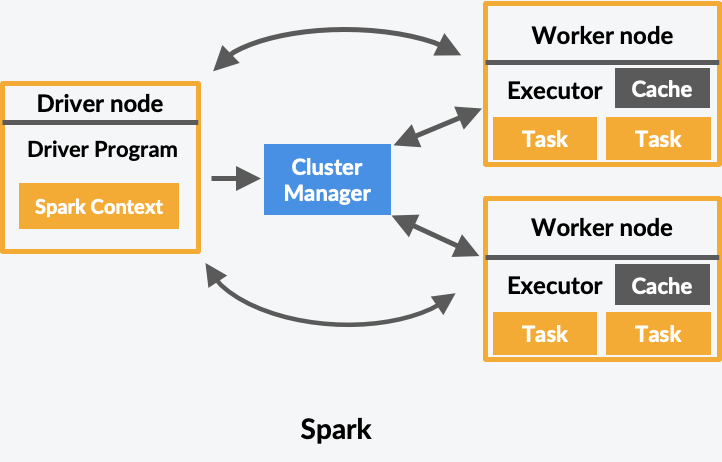

### The SparkContext's Role
The SparkContext's primary function is not to execute code, but rather to devise an optimized physical execution plan within the Spark framework. It serves as the initial entry point of Spark into the distributed environment.

### The Driver Program's Role
The driver program is akin to the main() method, containing instructions and actions to be executed on the data residing in each worker node. It constructs a generalized logical graph of operations, which primarily involve generating RDDs from source data, applying transformation functions for data manipulation and filtering, and concluding with actions such as data storage or printing.

As the driver program executes, the logical graph is converted into an execution plan. In Spark terminology, a task or action on data is referred to as a Spark job, which is further divided into distinct stages. These stages ensure the reliability and fault tolerance of the Spark environment, as elaborated in later sections. Ultimately, each stage encompasses tasks that are executed in parallel by the respective data partitions.

Once the complete execution plan is prepared, the Spark driver collaborates with executors to execute various tasks.

### The Executor's Role
Executors are processes initiated for a Spark application on worker nodes. Each worker node houses one or more executors, responsible for task execution.

An executor's principal duty is to execute tasks and transmit results to the driver program. It also holds cached data generated during the execution of a user program. A single executor can utilize one or more cores on a given worker node.

**Assuming the Following**

If one executor operates on a single core, and a worker node encompasses eight cores, then a single worker node will host eight executors. Since each executor possesses only one core for task execution, program operations cannot be parallelized.

If one executor operates on two cores, and a worker node encompasses eight cores, then a single worker node will contain four executors. With each executor equipped with two cores for task execution, program operations can be parallelized.

### **The role of cluster manager**
It launches the executor programs and allocates and manages the resources allocated to each component.

### **PySpark**

PySpark is the Python API of Spark; which means it can do almost all the things python can. Machine learning(ML) pipelines, exploratory data analysis (at scale), ETLs for data platform, and much more! And all of them in a distributed manner. One of the best parts of pyspark is that if you are already familiar with python, it's really easy to learn.

Apart from PySpark, there is another language called Scala used for big data processing. Scala is frequently over 10 times faster than Python, as it is native for Hadoop as its based on JVM. But PySpark is getting adopted at a fast rate because of the ease of use, easier learning curve and ML capabilities.

- Cluster is a set of loosely or tightly connected computers that work together so that they can be viewed as a single system.

- Hadoop is an open source, scalable, and fault tolerant framework written in Java. It efficiently processes large volumes of data on a cluster of commodity hardware. Hadoop is not only a storage system but is a platform for large data storage as well as processing.

- HDFS (Hadoop distributed file system). It is one of the world's most reliable storage system. HDFS is a Filesystem of Hadoop designed for storing very large files running on a cluster of commodity hardware.

- MapReduce is a data Processing framework, which has 2 phases - Mapper and Reducer. The map procedure performs filtering and sorting, and the reduce method performs a summary operation. It usually runs on a hadoop cluster.

- Transformation refers to the operations applied on a dataset to create a new dataset. Filter, groupBy and map are the examples of transformations.

- Actions Actions refer to an operation which instructs Spark to perform computation and send the result back to driver. This is an example of action.

### **Spark installation**

Install Dependencies:


1.   Java 8
2.   Apache Spark with hadoop and
3.   Findspark (used to locate the spark in the system)

> If you have issues with spark version, please upgrade to the latest version from [here](https://archive.apache.org/dist/spark/).

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

**Set Environment Variables:**

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [3]:
!ls

sample_data  spark-3.5.1-bin-hadoop3  spark-3.5.1-bin-hadoop3.tgz


In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark

In [7]:
# Load data from csv to a dataframe.
# header=True means the first row is a header
# sep=';' means the column are seperated using ''
df = spark.read.csv('cars.csv', header=True, sep=";")
df.show(5)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



The above command loads our data from into a dataframe (DF). A dataframe is a 2-dimensional labeled data structure with columns of potentially different types.

### **View Dataframe**

-   `df.take(5)` will return a list of five Row objects.
-   `df.collect()` will get all of the data from the entire DataFrame. Be really careful when using it, because if you have a large data set, you can easily crash the driver node.
-   `df.show()` is the most commonly used method to view a dataframe. There are a few parameters we can pass to this method, like the number of rows and truncaiton. For example, `df.show(5, False)` or ` df.show(5, truncate=False)` will show the entire data wihtout any truncation.
-   `df.limit(5)` will **return a new DataFrame** by taking the first n rows. As spark is distributed in nature, there is no guarantee that `df.limit()` will give you the same results each time.


In [8]:
df.show(5, truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [9]:
df.limit(5)

Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
Chevrolet Chevell...,18.0,8,307.0,130.0,3504.,12.0,70,US
Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


### View Columns

In [10]:
df.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

### **Dataframe Schema**

There are two methods commonly used to view the data types of a dataframe:

In [ ]:
df.dtypes

[('Car', 'string'),
 ('MPG', 'string'),
 ('Cylinders', 'string'),
 ('Displacement', 'string'),
 ('Horsepower', 'string'),
 ('Weight', 'string'),
 ('Acceleration', 'string'),
 ('Model', 'string'),
 ('Origin', 'string')]

In [ ]:
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



#### **Inferring Schema Implicitly**

We can use the parameter `inferschema=true` to infer the input schema automatically while loading the data. An example is shown below:

In [11]:
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: decimal(4,0) (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



As you can see, the datatype has been infered automatically spark with even the correct precison for decimal type. A problem that might arise here is that sometimes, when you have to read multiple files with different schemas in different files, there might be an issue with implicit inferring leading to null values in some columns. Therefore, let us also see how to define schemas explicitly.

#### **Defining Schema Explicitly**

In [12]:
from pyspark.sql.types import *
df.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

In [13]:
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504  |12.0        |70   |US    |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693  |11.5        |70   |US    |
|Plymouth Satellite              |18.0|8        |318.0       |150.0     |3436  |11.0        |70   |US    |
|AMC Rebel SST                   |16.0|8        |304.0       |150.0     |3433  |12.0        |70   |US    |
|Ford Torino                     |17.0|8        |302.0       |140.0     |3449  |10.5        |70   |US    |
|Ford Galaxie 500                |15.0|8        |429.0       |198.0     |4341  |10.0        |70   |US    |
|Chevrolet Impala                |14.

As we can see here, the data has been successully loaded with the specified datatypes.

## **DataFrame Operations on Columns**

We will go over the following in this section:

1.   Selecting Columns
2.   Selecting Multiple Columns
3.   Adding New Columns
4.   Renaming Columns
5.   Grouping By Columns
6.   Removing Columns



### **Selecting Columns**

In [14]:
# 1st method
# Column name is case sensitive in this usage
print(df.Car)
print("*"*20)
df.select(df.Car).show(truncate=False)

Column<'Car'>
********************
+--------------------------------+
|Car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



In [15]:
# 2nd method
# Column name is case insensitive here
print(df['car'])
print("*"*20)
df.select(df['car']).show(truncate=False)

Column<'car'>
********************
+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



In [16]:
# 3rd method
# Column name is case insensitive here
from pyspark.sql.functions import col
df.select(col('car')).show(truncate=False)

+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



### **Selecting Multiple Columns**

In [17]:
# 1st method
# Column name is case sensitive in this usage
print(df.Car, df.Cylinders)
print("*"*40)
df.select(df.Car, df.Cylinders).show(truncate=False)

Column<'Car'> Column<'Cylinders'>
****************************************
+--------------------------------+---------+
|Car                             |Cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302   

In [18]:
# 2nd method
# Column name is case insensitive in this usage
print(df['car'],df['cylinders'])
print("*"*40)
df.select(df['car'],df['cylinders']).show(truncate=False)

Column<'car'> Column<'cylinders'>
****************************************
+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302   

In [19]:
# 3rd method
# Column name is case insensitive in this usage
from pyspark.sql.functions import col
df.select(col('car'),col('cylinders')).show(truncate=False)

+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302           |8        |
|Chevrolet Monte Carlo           |8        |
|Buick Est

### **Adding New Columns**

We will take a look at three cases here:

1.   Adding a new column
2.   Adding multiple columns
3.   Deriving a new column from an exisitng one

In [20]:
# CASE 1: Adding a new column
# We will add a new column called 'first_column' at the end
from pyspark.sql.functions import lit
df = df.withColumn('first_column',lit(1))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504  |12.0        |70   |US    |1           |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693  |11.5        |70   |US    |1           |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436  |11.0        |70   |US    |1           |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433  |12.0        |70   |US    |1           |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449  |10.5        |70   |US    |1           |
+-------------------------+----+---------+------------+----------+------+------------+-----+----

In [21]:
# CASE 2: Adding multiple columns
# We will add two new columns called 'second_column' and 'third_column' at the end
df = df.withColumn('second_column', lit(2)) \
       .withColumn('third_column', lit('Third Column'))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|second_column|third_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504  |12.0        |70   |US    |1           |2            |Third Column|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693  |11.5        |70   |US    |1           |2            |Third Column|
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436  |11.0        |70   |US    |1           |2            |Third Column|
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433  |12.0        |70   |US    |1           |2            |Third Column|
|Ford Torino        

In [22]:
# CASE 3: Deriving a new column from an exisitng one
# We will add a new column called 'car_model' which has the value of car and model appended together with a space in between
from pyspark.sql.functions import concat
df = df.withColumn('car_model', concat(col("Car"), lit(" "), col("model")))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|second_column|third_column|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+-------------+------------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504  |12.0        |70   |US    |1           |2            |Third Column|Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693  |11.5        |70   |US    |1           |2            |Third Column|Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436  |11.0        |70   |US    |1           |2            |Third Column|Plymouth Satelli

As we can see, the new column car model has been created from existing columns. Since our aim was to create a column which has the value of car and model appended together with a space in between we have used the `concat` operator.

### **Renaming Columns**

We use the `withColumnRenamed` function to rename a columm in PySpark. Let us see it in action below:

In [23]:
# Renaming a column in PySpark
df = df.withColumnRenamed('first_column', 'new_column_one') \
       .withColumnRenamed('second_column', 'new_column_two') \
       .withColumnRenamed('third_column', 'new_column_three')
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+-----------------------------------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_one|new_column_two|new_column_three|car_model                          |
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+-----------------------------------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504  |12.0        |70   |US    |1             |2             |Third Column    |Chevrolet Chevelle Malibu 70       |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693  |11.5        |70   |US    |1             |2             |Third Column    |Buick Skylark 320 70               |
|Plymouth Satellite              |18.0|8        |3

### **Grouping By Columns**

Here, we see the Dataframe API way of grouping values. We will discuss how to:


1.   Group By a single column
2.   Group By multiple columns

In [ ]:
# Group By a column in PySpark
df.groupBy('Origin').count().show(5)

+------+-----+
|Origin|count|
+------+-----+
|Europe|   73|
|    US|  254|
| Japan|   79|
+------+-----+



In [ ]:
# Group By multiple columns in PySpark
df.groupBy('Origin', 'Model').count().show(5)

+------+-----+-----+
|Origin|Model|count|
+------+-----+-----+
|Europe|   71|    5|
|Europe|   80|    9|
|Europe|   79|    4|
| Japan|   75|    4|
|    US|   72|   18|
+------+-----+-----+
only showing top 5 rows



<a id='removing-columns'></a>
### Removing Columns

In [ ]:
# Remove columns in PySpark
df = df.drop('new_column_one')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_two|new_column_three|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |2             |Third Column    |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |2             |Third Column    |Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |2             |Third Column    |Plymouth Satellite 70       |
|AMC Rebel SST            |16.0|8 

In [ ]:
# Remove multiple columnss in one go
df = df.drop('new_column_two') \
       .drop('new_column_three')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |Plymouth Satellite 70       |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |AMC Rebel SST 70            |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US   

## **DataFrame Operations on Rows**

We will discuss the follwoing in this section:

1.   Filtering Rows
2. 	 Get Distinct Rows
3.   Sorting Rows
4.   Union Dataframes



<a id='filtering-rows'></a>
### Filtering Rows

In [ ]:
# Filtering rows in PySpark
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))
europe_filtered_count = df.filter(col('Origin')=='Europe').count()
print("EUROPE FILTERED RECORD COUNT: " + str(europe_filtered_count))
df.filter(col('Origin')=='Europe').show(truncate=False)

TOTAL RECORD COUNT: 406
EUROPE FILTERED RECORD COUNT: 73
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Citroen DS-21 Pallas        |0.0 |4        |133.0       |115.0     |3090.0|17.5        |70   |Europe|Citroen DS-21 Pallas 70        |
|Volkswagen 1131 Deluxe Sedan|26.0|4        |97.0        |46.0      |1835.0|20.5        |70   |Europe|Volkswagen 1131 Deluxe Sedan 70|
|Peugeot 504                 |25.0|4        |110.0       |87.0      |2672.0|17.5        |70   |Europe|Peugeot 504 70                 |
|Audi 100 LS                 |24.0|4        |107.0       |90.0      |2430.0|14.5        |70   |Europe|Audi 100 LS 70                 

In [ ]:
# Filtering rows in PySpark based on Multiple conditions
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))
europe_filtered_count = df.filter((col('Origin')=='Europe') &
                                  (col('Cylinders')==4)).count() # Two conditions added here
print("EUROPE FILTERED RECORD COUNT: " + str(europe_filtered_count))
df.filter(col('Origin')=='Europe').show(truncate=False)

TOTAL RECORD COUNT: 406
EUROPE FILTERED RECORD COUNT: 66
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Citroen DS-21 Pallas        |0.0 |4        |133.0       |115.0     |3090.0|17.5        |70   |Europe|Citroen DS-21 Pallas 70        |
|Volkswagen 1131 Deluxe Sedan|26.0|4        |97.0        |46.0      |1835.0|20.5        |70   |Europe|Volkswagen 1131 Deluxe Sedan 70|
|Peugeot 504                 |25.0|4        |110.0       |87.0      |2672.0|17.5        |70   |Europe|Peugeot 504 70                 |
|Audi 100 LS                 |24.0|4        |107.0       |90.0      |2430.0|14.5        |70   |Europe|Audi 100 LS 70                 

### **Get Distinct Rows**

In [ ]:
#Get Unique Rows in PySpark
df.select('Origin').distinct().show()

+------+
|Origin|
+------+
|Europe|
|    US|
| Japan|
+------+



In [ ]:
# Get Unique Rows in PySpark based on mutliple columns
df.select('Origin','model').distinct().show()

+------+-----+
|Origin|model|
+------+-----+
|Europe|   71|
|Europe|   80|
|Europe|   79|
| Japan|   75|
|    US|   72|
|    US|   80|
|Europe|   74|
| Japan|   79|
|Europe|   76|
|    US|   75|
| Japan|   77|
|    US|   82|
| Japan|   80|
| Japan|   78|
|    US|   78|
|Europe|   75|
|    US|   71|
|    US|   77|
| Japan|   70|
| Japan|   71|
+------+-----+
only showing top 20 rows



### **Sorting Rows**

In [ ]:
# Sort Rows in PySpark
# By default the data will be sorted in ascending order
df.orderBy('Cylinders').show(truncate=False)

+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------------------------+
|Mazda RX2 Coupe             |19.0|3        |70.0        |97.0      |2330.0|13.5        |72   |Japan |Mazda RX2 Coupe 72             |
|Mazda RX3                   |18.0|3        |70.0        |90.0      |2124.0|13.5        |73   |Japan |Mazda RX3 73                   |
|Mazda RX-4                  |21.5|3        |80.0        |110.0     |2720.0|13.5        |77   |Japan |Mazda RX-4 77                  |
|Mazda RX-7 GS               |23.7|3        |70.0        |100.0     |2420.0|12.5        |80   |Japan |Mazda RX-7 GS 80               |
|Datsun 510 (sw)             |28.0|4        |97.0      

In [ ]:
# To change the sorting order, you can use the ascending parameter
df.orderBy('Cylinders', ascending=False).show(truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Plymouth 'Cuda 340       |14.0|8        |340.0       |160.0     |3609.0|8.0         |70   |US    |Plymouth 'Cuda 340 70       |
|Pontiac Safari (sw)      |13.0|8        |400.0       |175.0     |5140.0|12.0        |71   |US    |Pontiac Safari (sw) 71      |
|Ford Mustang Boss 302    |0.0 |8        |302.0       |140.0     |3353.0|8.0         |70   |US    |Ford Mustang Boss 302 70    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |Buick Skylark 320 70        |
|Chevrolet Monte Carlo    |15.0|8        |400.0       |150.0     |3761.0|9.5         |70   |US   

In [ ]:
# Using groupBy aand orderBy together
df.groupBy("Origin").count().orderBy('count', ascending=False).show(10)

+------+-----+
|Origin|count|
+------+-----+
|    US|  254|
| Japan|   79|
|Europe|   73|
+------+-----+



### **Union Dataframes**

We will see three main methods for performing union of dataframes. It is important to know the difference between them and which one is preferred:

*   `union()` – It is used to merge two DataFrames of the same structure/schema. If schemas are not the same, it returns an error
*   `unionAll()` – This function is deprecated since Spark 2.0.0, and replaced with union()
*   `unionByName()` - This function is used to merge two dataframes based on column name.

> Since `unionAll()` is deprecated, **`union()` is the preferred method for merging dataframes.**
<br>
> The difference between `unionByName()` and `union()` is that `unionByName()` resolves columns by name, not by position.

In other SQLs, Union eliminates the duplicates but UnionAll merges two datasets, thereby including duplicate records. But, in PySpark, both behave the same and includes duplicate records. The recommendation is to use `distinct()` or `dropDuplicates()` to remove duplicate records.

In [ ]:
# CASE 1: Union When columns are in order
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)
europe_cars = df.filter((col('Origin')=='Europe') & (col('Cylinders')==5))
japan_cars = df.filter((col('Origin')=='Japan') & (col('Cylinders')==3))
print("EUROPE CARS: "+str(europe_cars.count()))
print("JAPAN CARS: "+str(japan_cars.count()))
print("AFTER UNION: "+str(europe_cars.union(japan_cars).count()))

EUROPE CARS: 3
JAPAN CARS: 4
AFTER UNION: 7


**Result:**

> As you can see here, there were 3 cars from Europe with 5 Cylinders, and 4 cars from Japan with 3 Cylinders. After union, there are 7 cars in total.



In [ ]:
# CASE 1: Union When columns are not in order
# Creating two dataframes with jumbled columns
df1 = spark.createDataFrame([[1, 2, 3]], ["col0", "col1", "col2"])
df2 = spark.createDataFrame([[4, 5, 6]], ["col1", "col2", "col0"])
df1.unionByName(df2).show()

+----+----+----+
|col0|col1|col2|
+----+----+----+
|   1|   2|   3|
|   6|   4|   5|
+----+----+----+



**Result:**

> As you can see here, the two dataframes have been successfully merged based on their column names.



## **Common Data Manipulation Functions**

In [ ]:
# Functions available in PySpark
from pyspark.sql import functions
# Similar to python, we can use the dir function to view the avaiable functions
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

### **String Functions**

In [ ]:
# Loading the data
from pyspark.sql.functions import col
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)

**Display the Car column in exisitng, lower and upper characters, and the first 4 characters of the column**

In [ ]:
from pyspark.sql.functions import col,lower, upper, substring
# Prints out the details of a function
help(substring)
# alias is used to rename the column name in the output
df.select(col('Car'),lower(col('Car')),upper(col('Car')),substring(col('Car'),1,4).alias("concatenated value")).show(5, False)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]

+---------------

**Concatenate the Car column and Model column and add a space between them.**

In [ ]:
from pyspark.sql.functions import concat
df.select(col("Car"),col("model"),concat(col("Car"), lit(" "), col("model"))).show(5, False)

+-------------------------+-----+----------------------------+
|Car                      |model|concat(Car,  , model)       |
+-------------------------+-----+----------------------------+
|Chevrolet Chevelle Malibu|70   |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |70   |Buick Skylark 320 70        |
|Plymouth Satellite       |70   |Plymouth Satellite 70       |
|AMC Rebel SST            |70   |AMC Rebel SST 70            |
|Ford Torino              |70   |Ford Torino 70              |
+-------------------------+-----+----------------------------+
only showing top 5 rows



### **Numeric functions**

**Show the oldest date and the most recent date**

In [ ]:
from pyspark.sql.functions import min, max
df.select(min(col('Weight')), max(col('Weight'))).show()

+-----------+-----------+
|min(Weight)|max(Weight)|
+-----------+-----------+
|       1613|       5140|
+-----------+-----------+



**Add 10 to the minimum and maximum weight**

In [ ]:
from pyspark.sql.functions import min, max, lit
df.select(min(col('Weight'))+lit(10), max(col('Weight')+lit(10))).show()

+------------------+------------------+
|(min(Weight) + 10)|max((Weight + 10))|
+------------------+------------------+
|              1623|              5150|
+------------------+------------------+



### **Operations on Date**

In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df.show()
df.printSchema()

+-------------------+
|                DOB|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+

root
 |-- DOB: string (nullable = true)



In [ ]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('DOB'),'yyyy-MM-dd HH:mm:ss'))
df.show()
df.printSchema()

+---------------------------------+--------------------------------------+
|to_date(DOB, yyyy-MM-dd HH:mm:ss)|to_timestamp(DOB, yyyy-MM-dd HH:mm:ss)|
+---------------------------------+--------------------------------------+
|                       2019-12-25|                   2019-12-25 13:30:00|
+---------------------------------+--------------------------------------+

root
 |-- to_date(DOB, yyyy-MM-dd HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, yyyy-MM-dd HH:mm:ss): timestamp (nullable = true)



In [ ]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('DOB'),'dd/MMM/yyyy HH:mm:ss'))
df.show()
df.printSchema()

+----------------------------------+---------------------------------------+
|to_date(DOB, dd/MMM/yyyy HH:mm:ss)|to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------+---------------------------------------+
|                        2019-12-25|                    2019-12-25 13:30:00|
+----------------------------------+---------------------------------------+

root
 |-- to_date(DOB, dd/MMM/yyyy HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss): timestamp (nullable = true)



**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [ ]:
from pyspark.sql.functions import date_add, date_sub
# create a dummy dataframe
df = spark.createDataFrame([('1990-01-01',),('1995-01-03',),('2021-03-30',)], ['Date'])
# find out the required dates
df.select(date_add(max(col('Date')),3), date_sub(min(col('Date')),3)).show()

+----------------------+----------------------+
|date_add(max(Date), 3)|date_sub(min(Date), 3)|
+----------------------+----------------------+
|            2021-04-02|            1989-12-29|
+----------------------+----------------------+



## **Joins in PySpark**

In [ ]:
# Create two dataframes
cars_df = spark.createDataFrame([[1, 'Car A'],[2, 'Car B'],[3, 'Car C']], ["id", "car_name"])
car_price_df = spark.createDataFrame([[1, 1000],[2, 2000],[3, 3000]], ["id", "car_price"])
cars_df.show()
car_price_df.show()

+---+--------+
| id|car_name|
+---+--------+
|  1|   Car A|
|  2|   Car B|
|  3|   Car C|
+---+--------+

+---+---------+
| id|car_price|
+---+---------+
|  1|     1000|
|  2|     2000|
|  3|     3000|
+---+---------+



In [ ]:
# Executing an inner join so we can see the id, name and price of each car in one row
cars_df.join(car_price_df, cars_df.id == car_price_df.id, 'inner').select(cars_df['id'],cars_df['car_name'],car_price_df['car_price']).show(truncate=False)

+---+--------+---------+
|id |car_name|car_price|
+---+--------+---------+
|1  |Car A   |1000     |
|2  |Car B   |2000     |
|3  |Car C   |3000     |
+---+--------+---------+



As you can see, we have done an inner join between two dataframes. The following joins are supported by PySpark:
1. inner (default)
2. cross
3. outer
4. full
5. full_outer
6. left
7. left_outer
8. right
9. right_outer
10. left_semi
11. left_anti

## **Spark SQL**

SQL has been around since the 1970s, and so one can imagine the number of people who made it their bread and butter. As big data came into popularity, the number of professionals with the technical knowledge to deal with it was in shortage. This led to the creation of Spark SQL.

Spark SQL is a Spark module for structured data processing. Unlike the basic Spark RDD API, the interfaces provided by Spark SQL provide Spark with more information about the structure of both the data and the computation being performed. Internally, Spark SQL uses this extra information to perform extra optimizations.

Basically, what we need to know is that Spark SQL is used to execute SQL queries on big data. Spark SQL can also be used to read data from Hive tables and views. Let me explain Spark SQL with an example.

In [ ]:
df = spark.read.csv('cars.csv', header=True, sep=";")
# Register Temporary Table
df.createOrReplaceTempView("temp")
# Select all data from temp table
spark.sql("select * from temp limit 5").show()
# Select count of data in table
spark.sql("select count(*) as total_count from temp").show()

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+

+-----------+
|total_count|
+-----------+
|        406|
+-----------+



As we can see, we registered the dataframe as temporary table and then ran basic SQL queries on it. How amazing is that?

If we are a person who is more comfortable with SQL, then this feature is truly a blessing for you! But this raises a question:

**Should I just keep using Spark SQL all the time?**

And the answer is, it depends.

So basically, the different functions acts in differnet ways, and depending upon the type of action you are trying to do, the speed at which it completes execution also differs. But as time progress, this feature is getting better and better, so hopefully the difference should be a small margin. There are plenty of analysis done on this, but nothing has a definite answer yet.

## **RDD (Resilient Distributed Dataset)**
With map, we define a function and then apply it record by record. Flatmap returns a new RDD by first applying a function to all of the elements in RDDs and then flattening the result. Filter, returns a new RDD. Meaning only the elements that satisfy a condition. With reduce, we are taking neighboring elements and producing a single combined result.

For example, let's say you have a set of numbers. We can reduce this to its sum by providing a function that takes as input two values and reduces them to one.

Some of the reasons we would use a dataframe over RDD are:
-   It's ability to represnt data as rows and columns. But this also means it can only hold structred and semi-structured data.
-   It allows processing data in different formats (AVRO, CSV, JSON, and storage system HDFS, HIVE tables, MySQL).
- It's superior job Optimization capability.
- DataFrame API is very easy to use.

**The key characteristics of RDDs are**

- Distributed Data Collection: RDDs are present in a distributed form across diverse worker nodes. This attribute enables RDDs to accommodate substantial datasets. The driver node assumes the responsibility of creating and overseeing this distribution.

- Resilience to Faults: This pertains to the capacity to regenerate RDDs if they become lost during computation. Essentially, fault tolerance means that even if an RDD becomes corrupted (due to memory volatility), you can restore the unaltered RDD (making it resilient).

- Immutability: RDDs are immutable, signifying that once an RDD undergoes transformation, a fresh RDD is generated, and you cannot make alterations to the previous RDDs. This trait of RDDs aids in preserving the data lineage, a concept you will delve into later in this session.

- Parallel Processing: Despite RDDs existing as distributed files across worker nodes, their processing occurs concurrently. Multiple worker nodes collaborate simultaneously to execute the entire task.

- Versatility in Data Sources: RDDs aren't reliant on any specific format of input data source. They are adaptable and can be constructed from a variety of sources.

In [ ]:
cars = spark.sparkContext.textFile('cars.csv')
print(cars.first())
cars_header = cars.first()
cars_rest = cars.filter(lambda line: line!=cars_header)
print(cars_rest.first())

Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
Chevrolet Chevelle Malibu;18.0;8;307.0;130.0;3504.;12.0;70;US


**How many cars are there in our csv data?**

In [ ]:
cars_rest.map(lambda line: line.split(";")).count()

406

**Display the Car name, MPG, Cylinders, Weight and Origin for the cars Originating in Europe**

In [ ]:
# Car name is column  0
(cars_rest.filter(lambda line: line.split(";")[8]=='Europe').
 map(lambda line: (line.split(";")[0],
    line.split(";")[1],
    line.split(";")[2],
    line.split(";")[5],
    line.split(";")[8])).collect())

[('Citroen DS-21 Pallas', '0', '4', '3090.', 'Europe'),
 ('Volkswagen 1131 Deluxe Sedan', '26.0', '4', '1835.', 'Europe'),
 ('Peugeot 504', '25.0', '4', '2672.', 'Europe'),
 ('Audi 100 LS', '24.0', '4', '2430.', 'Europe'),
 ('Saab 99e', '25.0', '4', '2375.', 'Europe'),
 ('BMW 2002', '26.0', '4', '2234.', 'Europe'),
 ('Volkswagen Super Beetle 117', '0', '4', '1978.', 'Europe'),
 ('Opel 1900', '28.0', '4', '2123.', 'Europe'),
 ('Peugeot 304', '30.0', '4', '2074.', 'Europe'),
 ('Fiat 124B', '30.0', '4', '2065.', 'Europe'),
 ('Volkswagen Model 111', '27.0', '4', '1834.', 'Europe'),
 ('Volkswagen Type 3', '23.0', '4', '2254.', 'Europe'),
 ('Volvo 145e (sw)', '18.0', '4', '2933.', 'Europe'),
 ('Volkswagen 411 (sw)', '22.0', '4', '2511.', 'Europe'),
 ('Peugeot 504 (sw)', '21.0', '4', '2979.', 'Europe'),
 ('Renault 12 (sw)', '26.0', '4', '2189.', 'Europe'),
 ('Volkswagen Super Beetle', '26.0', '4', '1950.', 'Europe'),
 ('Fiat 124 Sport Coupe', '26.0', '4', '2265.', 'Europe'),
 ('Fiat 128', '29

**Display the Car name, MPG, Cylinders, Weight and Origin for the cars Originating in either Europe or Japan**

In [ ]:
# Car name is column  0
(cars_rest.filter(lambda line: line.split(";")[8] in ['Europe','Japan']).
 map(lambda line: (line.split(";")[0],
    line.split(";")[1],
    line.split(";")[2],
    line.split(";")[5],
    line.split(";")[8])).collect())

[('Citroen DS-21 Pallas', '0', '4', '3090.', 'Europe'),
 ('Toyota Corolla Mark ii', '24.0', '4', '2372.', 'Japan'),
 ('Datsun PL510', '27.0', '4', '2130.', 'Japan'),
 ('Volkswagen 1131 Deluxe Sedan', '26.0', '4', '1835.', 'Europe'),
 ('Peugeot 504', '25.0', '4', '2672.', 'Europe'),
 ('Audi 100 LS', '24.0', '4', '2430.', 'Europe'),
 ('Saab 99e', '25.0', '4', '2375.', 'Europe'),
 ('BMW 2002', '26.0', '4', '2234.', 'Europe'),
 ('Datsun PL510', '27.0', '4', '2130.', 'Japan'),
 ('Toyota Corolla', '25.0', '4', '2228.', 'Japan'),
 ('Volkswagen Super Beetle 117', '0', '4', '1978.', 'Europe'),
 ('Opel 1900', '28.0', '4', '2123.', 'Europe'),
 ('Peugeot 304', '30.0', '4', '2074.', 'Europe'),
 ('Fiat 124B', '30.0', '4', '2065.', 'Europe'),
 ('Toyota Corolla 1200', '31.0', '4', '1773.', 'Japan'),
 ('Datsun 1200', '35.0', '4', '1613.', 'Japan'),
 ('Volkswagen Model 111', '27.0', '4', '1834.', 'Europe'),
 ('Toyota Corolla Hardtop', '24.0', '4', '2278.', 'Japan'),
 ('Volkswagen Type 3', '23.0', '4', '

## **User-Defined Functions (UDF)**

PySpark User-Defined Functions (UDFs) help you convert your python code into a scalable version of itself. It comes in handy more than you can imagine, but beware, as the performance is less when you compare it with pyspark functions. You can view examples of how UDF works here. What I will give in this section is some theory on how it works, and why it is slower.

When we try to run a UDF in PySpark, each executor creates a python process. Data will be serialised and deserialised between each executor and python. This leads to lots of performance impact and overhead on spark jobs, making it less efficent than using spark dataframes. Apart from this, sometimes you might have memory issues while using UDFs. The Python worker consumes huge off-heap memory and so it often leads to memoryOverhead, thereby failing our job.

In [24]:
from pyspark.sql import Row
mylist = [
  {"name":'Alice',"age":13},
  {"name":'Jacob',"age":24},
  {"name":'Betty',"age":135},
]
spark.createDataFrame(Row(**x) for x in mylist).show()

+-----+---+
| name|age|
+-----+---+
|Alice| 13|
|Jacob| 24|
|Betty|135|
+-----+---+



In [26]:
# we can achieve the same using this - note that we are using spark context here, not a spark session
from pyspark.sql import Row
from pyspark.sql import SparkSession # import SparkSession

# Building the Spark Session
spark = SparkSession.builder.appName('MyApp').getOrCreate()
sc = spark.sparkContext # Create a SparkContext from the SparkSession

df = sc.parallelize([
        Row(name='Alice', age=13),
        Row(name='Jacob', age=24),
        Row(name='Betty', age=135)]).toDF()
df.show()

+-----+---+
| name|age|
+-----+---+
|Alice| 13|
|Jacob| 24|
|Betty|135|
+-----+---+



<a id='drop-duplicates'></a>
## Drop Duplicates

In [27]:
from pyspark.sql import Row
from pyspark.sql import Row
mylist = [
  {"name":'Alice',"age":5,"height":80},
  {"name":'Jacob',"age":24,"height":80},
  {"name":'Alice',"age":5,"height":80}
]
df = spark.createDataFrame(Row(**x) for x in mylist)
df.dropDuplicates().show()

+-----+---+------+
| name|age|height|
+-----+---+------+
|Alice|  5|    80|
|Jacob| 24|    80|
+-----+---+------+



`dropDuplicates()` can also take in an optional parameter called *subset* which helps specify the columns on which the duplicate check needs to be done on.

In [ ]:
df.dropDuplicates(subset=['height']).show()

+-----+---+------+
| name|age|height|
+-----+---+------+
|Alice|  5|    80|
+-----+---+------+

